In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import re

data_frame_info = []


In [4]:
def vertical_symmetry(symtest):
    for i in range(0, 9):
        for j in range(0, 9):
            if symtest[i, j] != symtest[8-i, j]:
                return False

    return True


def horizontal_symmetry(symtest):
    for i in range(0, 9):
        for j in range(0, 9):
            if symtest[i, j] != symtest[i, 8-j]:
                return False

    return True


def two_fold_rotational_symmetry(symtest):
    for i in range(0, 9):
        for j in range(0, 9):
            if symtest[i, j] != symtest[8-i, 8-j]:
                return False

    return True


def four_fold_rotational_symmetry(symtest):
    fold_1 = symtest[:5, :5]
    fold_2 = symtest[4:, 4:]
    fold_3 = symtest[4:, :5]
    fold_4 = symtest[:5, :5]

    if np.array_equal(fold_1, np.rot90(np.rot90(fold_2))) and np.array_equal(fold_1, np.rot90(np.rot90(np.rot90(fold_3)))) and np.array_equal(fold_1, np.rot90(np.rot90(np.rot90(np.rot90(fold_4))))):
        return True
    else:
        return False


def assymetry(symtest):

    if vertical_symmetry(symtest) or horizontal_symmetry(symtest) or two_fold_rotational_symmetry(symtest) or four_fold_rotational_symmetry(symtest):
        return False
    else:
        return True


In [5]:
for name in glob.glob('Output/count*.txt'):
    numbers = re.findall(r'\d+' , name)
    if len(numbers) == 0:
        continue
    file_number = int(numbers[0])

    main = open("Inputs\\input.txt")

    i = 1

    symtest = np.zeros([9, 9])

    for single in main:

        if i != file_number:
            i += 1
            continue

        for ind in range(9):

            for j in range(9):

                if(single[ind*9+j] != '.'):

                    symtest[ind][j] = 1

    main.close()

    with open(name , 'r') as f:
        parse = [line for line in f]
        if len(parse) > 3:
            start_time = float(parse[1])
            end_time = float(parse[-1])
            diff = parse[-2].split()[-1]
            data_frame_info.append({"File": file_number, "Time" : end_time - start_time , "Difficulty" : diff , 
                                    "Two Fold Rotational Symmetry": two_fold_rotational_symmetry(symtest), "Four Fold Rotational Symmetry": four_fold_rotational_symmetry(symtest),
                                    "Vertical Symmetry": vertical_symmetry(symtest), "Horizontal Symmetry": horizontal_symmetry(symtest), "Assymetry": assymetry(symtest)})

data = pd.DataFrame(data_frame_info)


<AxesSubplot:xlabel='Time', ylabel='Difficulty'>

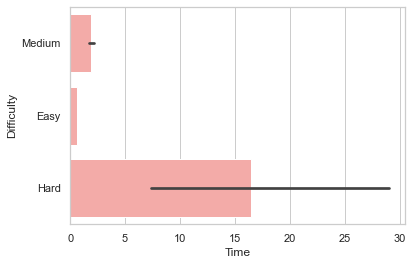

In [6]:
sns.set_theme(style="whitegrid")

# Set up a grid of axes with a polar projection
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Time", y="Difficulty", data=data,
            label="Sudoku", color="r")
